# TELCO CUSTOMER CHURN
### Focused customer retention programs

### Who is Telco ?
Telco Systems is market-leading solutions enable service providers to create and operate high quality, service assured, carrier-grade, intelligent networks. They bring over 40 years of experience to the design and development of advanced, high-performance telecom network communications solutions. 

Telco provide the capabilities for service differentiation that enable new forms of revenue production, maximizing network profitability. Service providers, large and small, depend on our consistent delivery of advanced solutions, enabling them to stay ahead of the capacity crunch while keeping total cost of ownership to a minimum.

(Refrence - http://www.telco.com/index.php?page=company-profile)

### Business Objective

Every retailer is concerned about high customer churn rate. Churn rate the number of customers who drop out of the buying cycle. It could be non renewal of a loyalty program, or unhappy customers going in search of a better service. One of the key things for the busines to run is loyal customeers , meaning minimize the churn rate.

#### Business objective of this exercise :
1. Analyze customer data to understand reason for churn  and who could be the next potential customer to leave the company
2. What contributes to the higher churn rate of customer and what could be some of the probable solution to address the same.

#### What type of problem is it ?
Supervised Machine Learning -  Classfication problem

#### How should performance be measured ?
Model performance of at least 70% is expected

#### Assumptions made :
1. The sample data is correct represetation of the entire population and is randomly selected
2. The columns in the dataset are exhaustive list of features that determine churn rate

#### Customer churn rate in the United States in 2017, by industry
Credit : https://www.statista.com/statistics/816735/customer-churn-rate-by-industry-us/

Looks like cable industry has highest churn rate.
<img src="files/customer_churn_rate.png">

### Content of the dataset
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents

## Import Libraries

In [1]:
#importing the libraries

#Data Processing Libraries
import numpy as np
import pandas as pd

#Data Vizuaization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Library
from sklearn.preprocessing import LabelEncoder # Encode Categorical Variable to Numerical Variable
from sklearn.preprocessing import Imputer # Imputer Class to replace missing values
from sklearn.metrics import confusion_matrix # Library for model evaluation
from sklearn.metrics import accuracy_score # Library for model evaluation
from sklearn.model_selection import train_test_split # Library to split datset into test and train

from sklearn.linear_model  import LogisticRegression # Logistic Regression Classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.ensemble  import RandomForestClassifier # Random Forest Classifier
from sklearn.neighbors import KNeighborsClassifier # K Nearest neighbors Classifier
from sklearn.naive_bayes import GaussianNB #Naive Bayes Classifier
from sklearn.svm import SVC #Support vector Machine Classifier

## Get Data

1. Source of data  - https://www.kaggle.com/blastchar/telco-customer-churn
2. Space - 955 KB
3. Legal Obligations - Free Dataset

In [41]:
# Read .csv file from location and load into pandas DataFrame
datset_churn = pd.read_csv('C:\\Users\\jagan\\OneDrive\\Documents\\Github_Portfolio\\data\\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [42]:
datset_churn_copy = datset_churn.copy() # Keeping a backup of original datset

### Basic Overview of dataset

#### Find out total rows and columns or shapes of the dataset

In [43]:
datset_churn.shape  # output = (rows, columns)

(7043, 21)

There are 7043 rows and 21 columns including the target/output variable.

#### Let's get the column names/information

In [44]:
print(datset_churn.columns.values)

['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


In [45]:
# Renaming the 3 columns.
datset_churn = datset_churn.rename(columns={'customerID' : 'CustomerID' , 'gender': 'Gender', 'tenure':'Tenure'})

Target Variable or The variable we want to predict - 'Churn'
Feature Variable  - All Other columns (First 20 columnns)

1. Customers who left within the last month –  'Churn'
2. Customer Services – 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup' 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
3. Customer Account information – 'Tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'
4. Customer Personal Information – 'Gender', 'SeniorCitizen', 'Partner', 'Dependents'

In [46]:
print(datset_churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
CustomerID          7043 non-null object
Gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
Tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

#### Which features are numerical?
SeniorCitizen, tenure, MonthlyCharges, TotalCharges

Continous - Tenure, MonthlyCharges, TotalCharges
Discrete  - SeniorCitizen

#### Which features are categorical?
PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, gender, Partner, Dependents

Ordinal data (variables with a meaningful order) - No.
Nominal data (categories that have no meaningful order) - All Columns.

#### Which features are mixed data types?
None

### Taking first look into data

In [47]:
datset_churn.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understanding the summary statistics , central tendency and dispersion of dataset

#### Summary Statistics of object variable.

In [48]:
datset_churn.describe(include=['O'])

,CustomerID,Gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3090-QFUVD,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


#### Observations :
1. customerID, gender, Partner, Dependents, PhoneService, PaperlessBilling - They have 2 unique categories. Yes/No and for gender Male/Female
2. MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract - They have 3 unique categories
3. Payment Method -  4 unique categories or 4 methods by which customer pays for their service

#### Summary Statistics of Numeric variable.

In [49]:
datset_churn.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#### Observations:
1. We have 4 numeric variables
2. Tenure can vary from 0 months to 72 months. This is how long customer is with Telco
3. Total Charges = Monthly Charges * Tenure
4. Looking at the count column, all columns have count as 7043 . TotalCharges have count of 7032, a differece of 11 records. These are missing records

### Assess missing values in dataset

In [50]:
print("Assess missing values in dataset")
total = datset_churn.isnull().sum().sort_values(ascending=False)
percent = (datset_churn.isnull().sum()/datset_churn.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

Assess missing values in dataset
                  Total   Percent
TotalCharges         11  0.001562
Churn                 0  0.000000
OnlineSecurity        0  0.000000
Gender                0  0.000000
SeniorCitizen         0  0.000000
Partner               0  0.000000
Dependents            0  0.000000
Tenure                0  0.000000
PhoneService          0  0.000000
MultipleLines         0  0.000000
InternetService       0  0.000000
OnlineBackup          0  0.000000
DeviceProtection      0  0.000000
TechSupport           0  0.000000
StreamingTV           0  0.000000
StreamingMovies       0  0.000000
Contract              0  0.000000
PaperlessBilling      0  0.000000
PaymentMethod         0  0.000000
MonthlyCharges        0  0.000000
CustomerID            0  0.000000



Observation - TotalCharges have 11 missing values. We will replace them with multiplying Tenure * MonthlyCharges value using Scikitlearn Imputer function.

### Replacing missing value

In [51]:
#Identifying the rows containing missing data
missing_value_row = list(datset_churn[datset_churn['TotalCharges'].isnull()].index)
print('Missing Value Rows-->', missing_value_row , '\nMissing data in rows-->', len(missing_value_row))

#Replacing missing data with Tenure X MonthlyCharges
for missing_row in missing_value_row :
    datset_churn['TotalCharges'][missing_row] = datset_churn['Tenure'][missing_row] * datset_churn['MonthlyCharges'][missing_row]

print("Assess missing values in dataset")
total = datset_churn.isnull().sum().sort_values(ascending=False)
percent = (datset_churn.isnull().sum()/datset_churn.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

Missing Value Rows--> [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754] 
Missing data in rows--> 11


C:\Users\jagan\Anaconda3\new\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Assess missing values in dataset
                  Total  Percent
Churn                 0      0.0
OnlineSecurity        0      0.0
Gender                0      0.0
SeniorCitizen         0      0.0
Partner               0      0.0
Dependents            0      0.0
Tenure                0      0.0
PhoneService          0      0.0
MultipleLines         0      0.0
InternetService       0      0.0
OnlineBackup          0      0.0
TotalCharges          0      0.0
DeviceProtection      0      0.0
TechSupport           0      0.0
StreamingTV           0      0.0
StreamingMovies       0      0.0
Contract              0      0.0
PaperlessBilling      0      0.0
PaymentMethod         0      0.0
MonthlyCharges        0      0.0
CustomerID            0      0.0


#### Missing values in MonthlyCharges are gone!!!

## Univariate Analysis

### Vizualizing the Categorical variables with bar chart

In [52]:
# Getting the list of all columns
columns_hist = list(datset_churn.columns)

#Removing the Numerical Variables
columns_hist.remove('CustomerID')
columns_hist.remove('SeniorCitizen')
columns_hist.remove('Tenure')
columns_hist.remove('MonthlyCharges')
columns_hist.remove('TotalCharges')

print('Column list :\n', columns_hist,'\n')
print('Total Columns Count :\n', len(columns_hist),'\n')# Total Categorical variables to be handled.
columns_hist_nparray = np.array(columns_hist)
columns_hist_nparray = np.reshape(columns_hist_nparray, (4,4)) # reshaping the columns into 4X4 matrix
print('Reshaped array:\n', columns_hist_nparray)

Column list :
 ['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'] 

Total Columns Count :
 16 

Reshaped array:
 [['Gender' 'Partner' 'Dependents' 'PhoneService']
 ['MultipleLines' 'InternetService' 'OnlineSecurity' 'OnlineBackup']
 ['DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies']
 ['Contract' 'PaperlessBilling' 'PaymentMethod' 'Churn']]


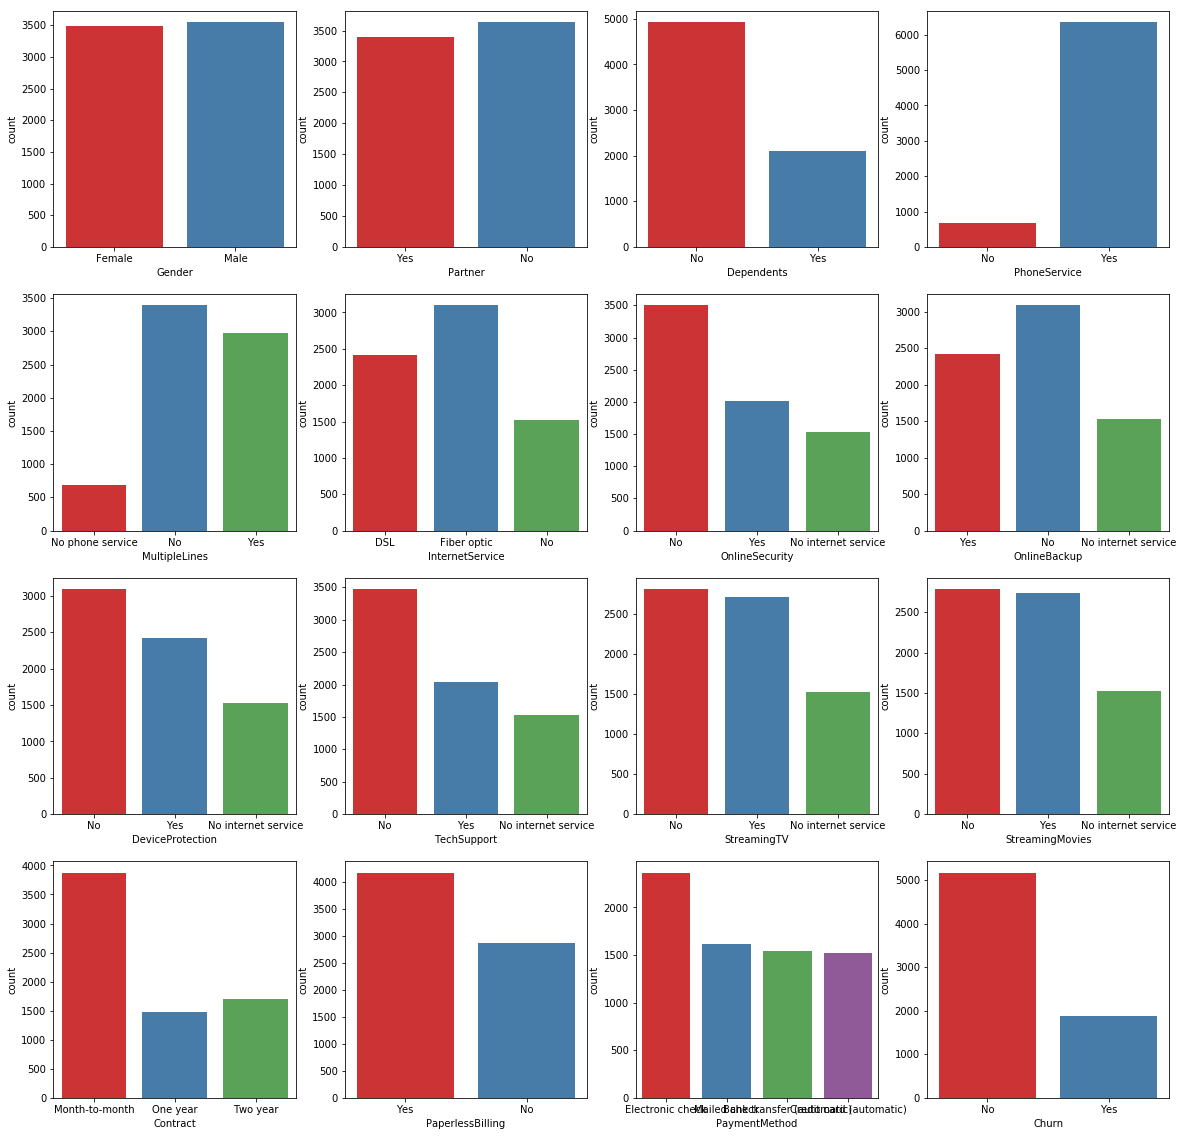

In [53]:
# Plotting the bar chart
rows = 4 ; columns = 4
f, axes = plt.subplots(rows, columns, figsize=(20, 20))
for row in range(rows):
    for column in range(columns):
        sns.countplot(datset_churn[columns_hist_nparray[row][column]], palette = "Set1", ax = axes[row, column])

#### Observations :
1. We have almost equal genders in our dataset
2. Almost 50% have partners
3. Around 30% have dependants
4. 85% of the customers have phone service
5. Around 40% customers have multiple lines
6. People prefer Fiber Optics over DSL for Internet
7. Around 30% have taken online security
8. Close 35% prefer device protection
9. Around 37% have registered for Streaming TV & MOvie
10. Contract - Majority of customers are subscribed for Month to Month contract (55%)
11. Majority of customers have opted Paperless billing
12. Majority of customers pay eletronic check. 77% prefer Automatic payment (Electronic check, Bank Transfer and Credit Card)

### Vizualizing the Numeric variables
#### Histogram to see data distribution of Quantitative Variables(SeniorCitizen, tenure, MonthlyCharges, TotalCharges)


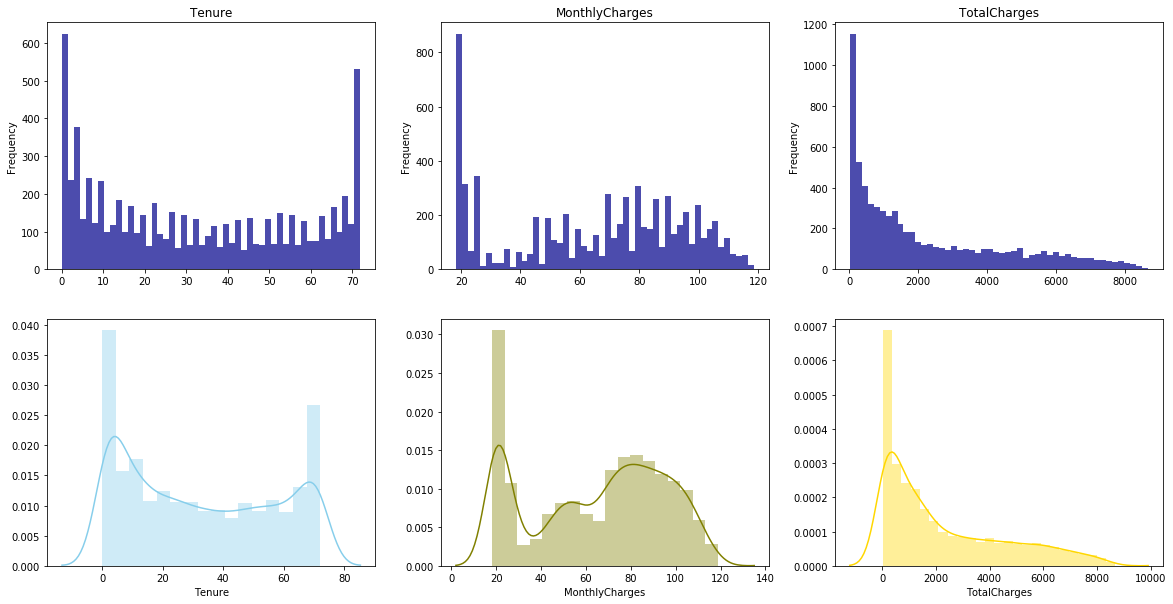

In [27]:
f, axes = plt.subplots(2, 3, figsize=(20,10))
#Charting the histogram
datset_churn["Tenure"].plot.hist(color='DarkBlue', alpha=0.7, bins=50, title='Tenure',ax=axes[0, 0])
datset_churn["MonthlyCharges"].plot.hist(color='DarkBlue', alpha=0.7, bins=50, title='MonthlyCharges',ax=axes[0, 1])
datset_churn["TotalCharges"].plot.hist(color='DarkBlue', alpha=0.7, bins=50, title='TotalCharges',ax=axes[0, 2])

#Charting the density plot
sns.distplot( datset_churn["Tenure"] , kde=True, rug=False, color="skyblue", ax=axes[1, 0])
sns.distplot( datset_churn["MonthlyCharges"] , kde=True, rug=False, color="olive", ax=axes[1, 1])
sns.distplot( datset_churn["TotalCharges"] , kde=True, rug=False, color="gold", ax=axes[1, 2])

#### Observations:
1. Tenure:

    1.1. Not a normal distribution. Bi-Modal distribution (having 2 peaks) which means data is concentrated across two different groups
    
    1.2 We have major chunk of customers in 0-1 month period. Lot of them might be cutomers who tried the service and left or liked the service and continued
    
    1.3. Between 10 months to 65 months, we can see flat distribution of data.
    
    1.4. We have lot customers in 69-72 months range. They are the loyal customers
   
   
 2. Monthly Charges  - 
 
     2.1. Not a normal distribution.Close to Bi-Modal distribution
     
     2.2. Majority of customers are in $18 to $20 range. Must be the service charge for basic service. Majority of customers are subscribed to basic package.
     
     2.3. Between $70-$100, we  have quite a number of customers. They might be the ones subscribed for multiple services.
     
     
 3. Total Charges - 
 
    3.1. Data is positively skewed.
    
    3.2. Majority of the population have spent close to $1,100
    
    3.3. Cutomers have spent upto $9,000   


#### Barchart for the Gender (0 is No , 1 is Yes)

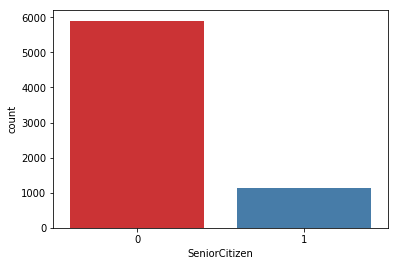

In [54]:
sns.countplot(datset_churn['SeniorCitizen'], palette = "Set1")

16% of customers are senior citizens

#### Let's Check for Outliers using Box Plot  for Tenure, MonthlyCharges, TotalCharges

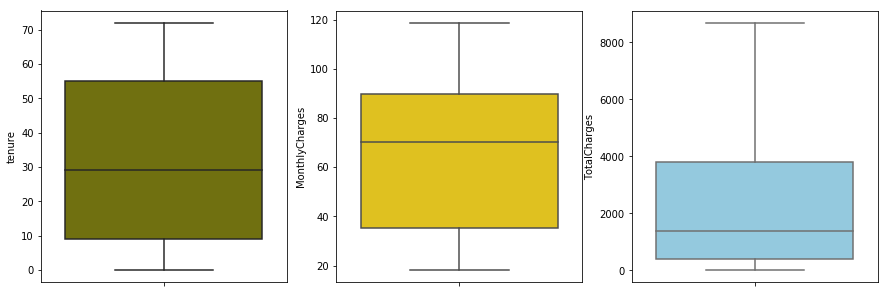

In [60]:
f, axes = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(x=datset_churn_copy["tenure"], orient="v", color="olive",ax=axes[0])
sns.boxplot(x=datset_churn_copy["MonthlyCharges"], orient="v", color="gold",ax=axes[1])
sns.boxplot(x=datset_churn_copy["TotalCharges"] , orient="v", color="skyblue",ax=axes[2])

Observation - Seems like we dont have outliers !

## Bivariate Analysis
Correlating the features with Targetget column (Churn)
Let us start by understanding correlations between numerical features and our solution goal (Churn).

A histogram chart is useful for analyzing continous numerical variables like tenure , Monthly Charges and Tital Charges where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands.

In [67]:
# Converting the categorical variable to numerical variable
datset_churn['Churn_Num'] = datset_churn['Churn'].map( {'Yes': 1, 'No': 0} ).astype(int)

In [68]:
# Chcking the mappaing
datset_churn[['Churn','Churn_Num']].head()

,Churn,Churn_Num
0,No,0
1,No,0
2,Yes,1
3,No,0
4,Yes,1


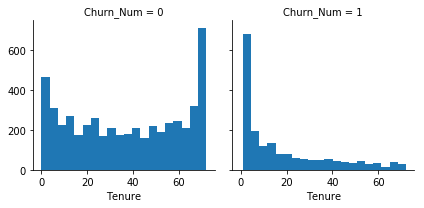

In [69]:
# Plotting Tenure Column with Churn
# Churn_num indicates customer who left the company. 0 indicates customer who stayed.
fighist = sns.FacetGrid(datset_churn, col='Churn_Num')
fighist.map(plt.hist, 'Tenure', bins=20) 

#### Observations:

1. Customer who left the Telco are mostly customers within 1st month (600+) and churn steady declines with time.
2. If customer can be retained between 10-20 months, there are high chances, customer will stay very long. Churn decreases over time
3. Customer at 72 month tenure, mostly stayed (Churn=0).

#### Decisions:

1. We should definitely use 'Tenure' column in our model training.
2. We should band 'Tenure'

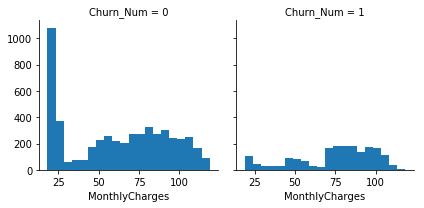

In [70]:
# Plotting MonthlyCharges Column with Churn
# Churn_num indicates customer who left the company. 0 indicates customer who stayed.
fighist = sns.FacetGrid(datset_churn, col='Churn_Num')
fighist.map(plt.hist, 'MonthlyCharges', bins=20)

#### Observation :
1. Majority of customers are in 18 to 20 range and they didn't leave
2. Customer Leaving are mostly in the bannd of 75-100  who have opted for multiple services.

#### Decisions :
1. We will use 'MonthlyCharges' column in our model training.
2. We should band 'MonthlyCharges'

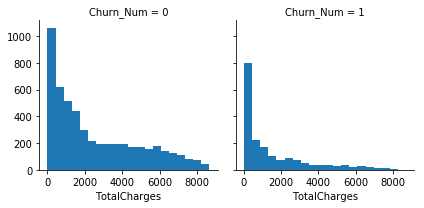

In [71]:
# Plotting TotalCharges Column with Churn
# Churn_num indicates customer who left the company. 0 indicates customer who stayed.
fighist = sns.FacetGrid(datset_churn, col='Churn_Num')
fighist.map(plt.hist, 'TotalCharges', bins=20)

#### Observation:
It's difficult to conclude anything using this column. Total charges are Tenure * MonthlyCharges . Tunur might me high and Monthly charges may be low and vice-versa. Data is positively skewed.

#### Decision
We will not use this column


### Now we will use the Categorical variables to determine if there are any realationships

#### We will use Seaborn Categorical Plot

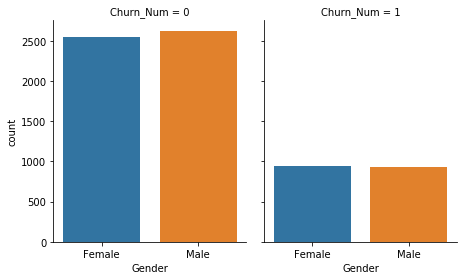

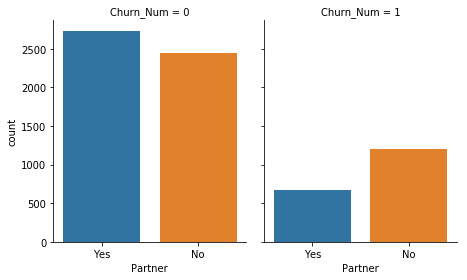

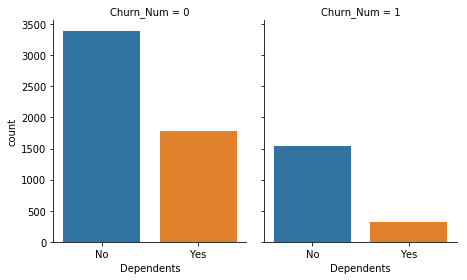

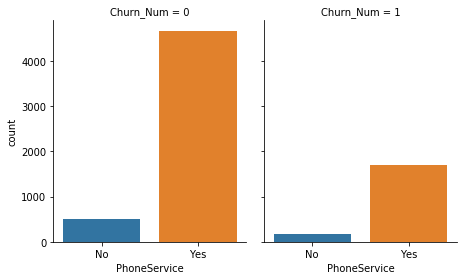

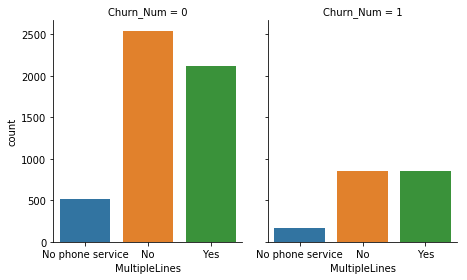

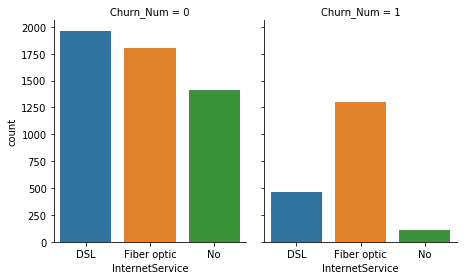

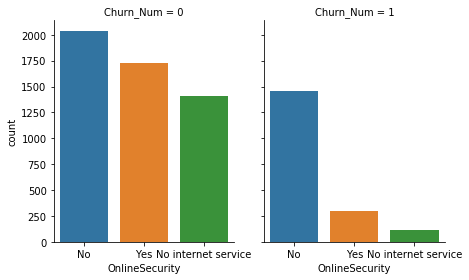

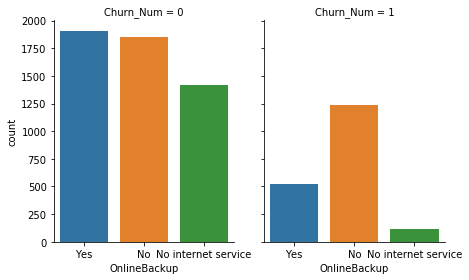

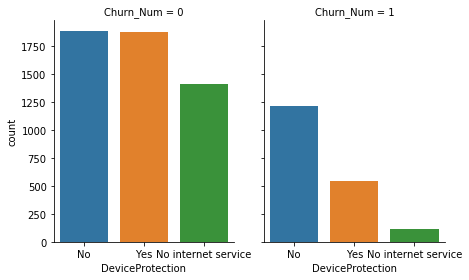

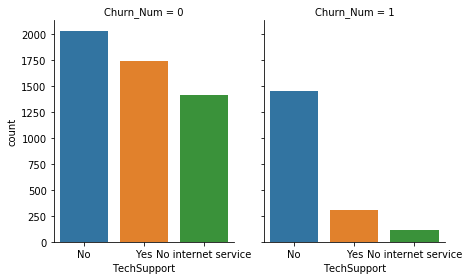

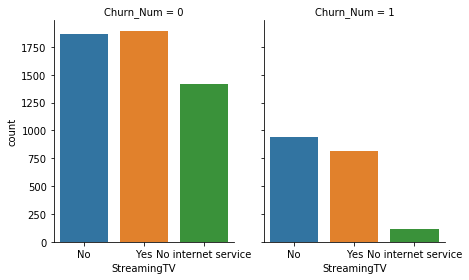

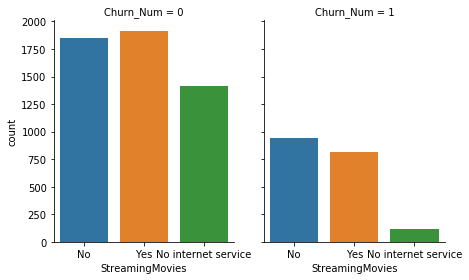

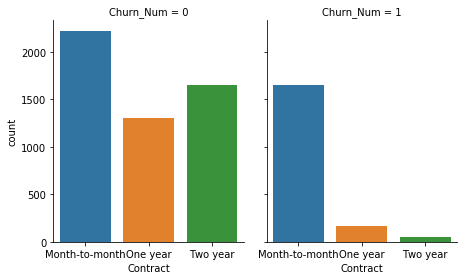

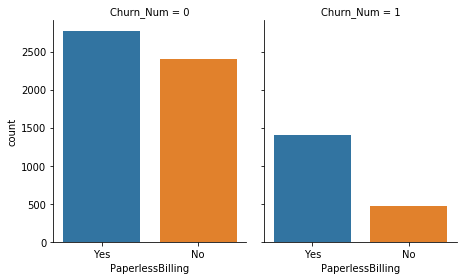

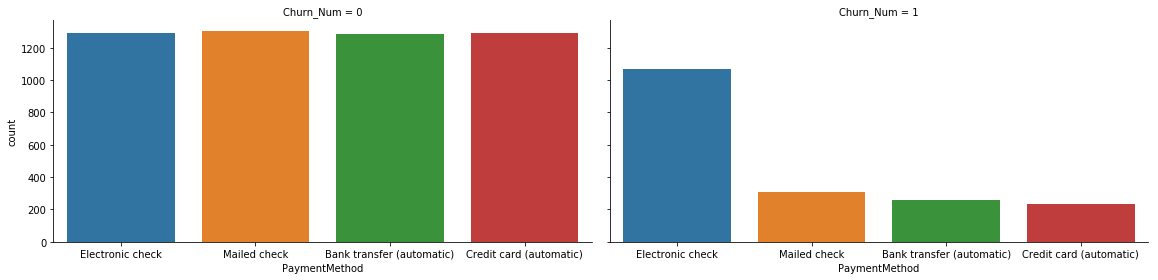

In [74]:
col_list = columns_hist
col_list.remove('Churn')
for col in col_list:
    if col == 'PaymentMethod':
        aspect_ratio = 2.0
    else:
        aspect_ratio = 0.8
        
    plot_cat_data = sns.catplot(x=col, col='Churn_Num', data = datset_churn, kind='count', height=4, aspect=aspect_ratio)

#### Observations:
1. 'Gender'  : Difficult to determine Churn using this field. Counts are almost same  in either category
2. 'Partner' : Customer without partner have higer chance of leaving
3. 'Dependents' :Customer without dependants have higer chance of leaving. We will merge Partner & Dependant Columns as 1 column
4. 'PhoneService' & 'MultipleLines' : We will merge these columns into PhoneLines - Single & Multiple and determine
5. 'InternetService' : Customer with Fiber Optic Interner Service have higher chances of leaving
6. 'OnlineSecurity' & 'OnlineBackup' : We will merge these columns for better visibility
7. 'DeviceProtection' : Cistomers without device protection have likely higher chances of leaving
8. 'TechSupport' - Customer not opting for TechSupport have higher chances of leaving 
9. 'StreamingTV', 'StreamingMovies' - We will merge these columns into streaming and check again
10. 'Contract' - Month to Month customers have likely higher chances to leave
11. 'PaperlessBilling' - Customers with paperless billing have higher chances of leaving
12. 'PaymentMethod' - People paying with electronic check have higher chances of leaving

### Creating new feature from existing set of columns using the above observations

#### Creating new columns for numerical variables - Tenure & Monthly Charges

#### Creating new derived columns for Categorical variables

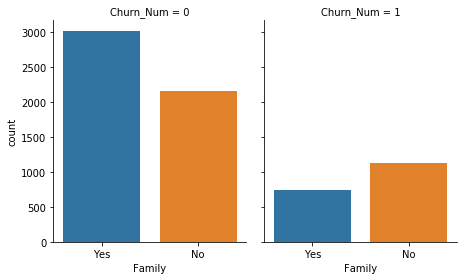

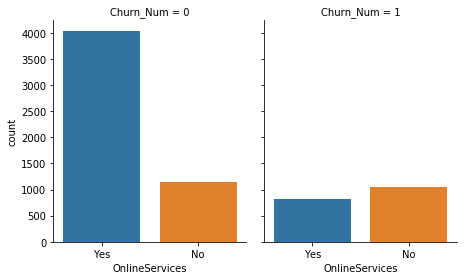

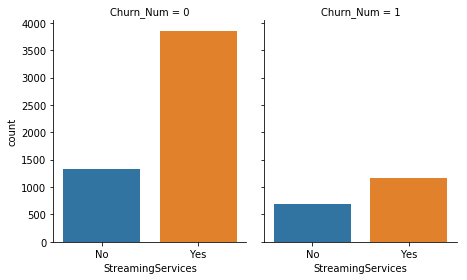

In [81]:
#Creating a new column for family. If a customer has dependant or Partner, I am considering it as family .
list_family = []
for rows in range(len(datset_churn['Partner'])):
    if ((datset_churn['Partner'][rows] == 'No') and (datset_churn['Dependents'][rows] == 'No')):
        list_family.append('No')
    else:
        list_family.append('Yes')
datset_churn['Family'] = list_family
#print(datset_churn[['Partner', 'Dependents', 'Family' ]].head(10))

#Creating a new column for Online Services (Online Security & Online Backup) . If a customer has Online Security or Online Backup services
#then , I am considering it as "Yes" else "No"
list_online_services = []
for rows_os in range(len(datset_churn['OnlineSecurity'])):
    if ((datset_churn['OnlineSecurity'][rows_os] == 'No') and (datset_churn['OnlineBackup'][rows_os] == 'No')):
        list_online_services.append('No')
    else:
        list_online_services.append('Yes')
datset_churn['OnlineServices'] = list_online_services

#print(datset_churn[['OnlineSecurity', 'OnlineBackup', 'OnlineServices' ]].head(10))
 
#Creating a new column for Streaming Services (StreamingTV & StreamingMovies) . If a customer has StreamingTV or StreamingMovies
#then , I am considering it as "Yes" else "No"
list_streaming_services = []
for rows_stv in range(len(datset_churn['StreamingTV'])):
    if ((datset_churn['StreamingTV'][rows_stv] == 'No') and (datset_churn['StreamingMovies'][rows_stv] == 'No')):
        list_streaming_services.append('No')
    else:
        list_streaming_services.append('Yes')
datset_churn['StreamingServices'] = list_streaming_services

#print(datset_churn[['StreamingTV', 'StreamingMovies', 'StreamingServices' ]].head(10))

plot_cat_data = sns.catplot(x='Family', col='Churn_Num', data = datset_churn, kind='count', height=4, aspect=0.8)
plot_cat_data = sns.catplot(x='OnlineServices', col='Churn_Num', data = datset_churn, kind='count', height=4, aspect=0.8)
plot_cat_data = sns.catplot(x='StreamingServices', col='Churn_Num', data = datset_churn, kind='count', height=4, aspect=0.8)

#### Observation
 - Customers with family are less likely to Churn
 - Customers not opted for online services (online backup or security) have slightly higher chances of churn
 - Customer opted for Streaming Services seems to have slightly higher chances of churn

#### Preparing Columns for Classification

In [ ]:
IN PROGRESS......